In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [32]:
proyectos = read_csv("data/mapeo_proyectos.csv")
investigadores = read_csv("data/mapeo_investigadores.csv")
recursos = read_csv("data/mapeo_recursos.csv")

In [33]:
proyectos.columns


Index(['ID proyecto', 'Título', 'Código proyecto', 'Descripción',
       'Área de procedencia/disciplina', 'Temas de investigación', 'Programa',
       'Subprograma', 'Palabra clave AEI', 'Focalizado en HD',
       'Temporalización (inicio)', 'Temporalización (fin)', 'Convocatoria',
       'Convocatoria (año)', 'Años', 'Financiación', 'Entidad financiadora',
       'Página web y redes sociales', 'Investigadores', 'ID investigadores',
       'Fuente de información', 'Estado', 'Fecha de publicación',
       'Última actualización', 'Nº de IPs', 'Género IP', 'CCAA', 'Organismo',
       'Centro'],
      dtype='object')

In [34]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

In [35]:
proyectos["Área de procedencia/disciplina"]

0                      Arqueología
1                      Arqueología
2            Lingüística y lenguas
3            Lingüística y lenguas
4            Lingüística y lenguas
                  ...             
481                      Filología
482                     Sociología
483                      Filología
484                      Filología
485    Historia, Historia del Arte
Name: Área de procedencia/disciplina, Length: 486, dtype: object

In [36]:
proyectos["Temas de investigación"]

0                  Análisis de imágenes | Artes visuales
1                  Análisis de imágenes | Artes visuales
2                                         Bases de datos
3                                         Bases de datos
4                                         Bases de datos
                             ...                        
481    Lingüística y lenguas | Lingüística computacional
482                                        Web semántica
483      Archivos digitales, repositorios y preservación
484      Archivos digitales, repositorios y preservación
485    Web semántica | Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [37]:
new_temas = [tema.split(" | ") for tema in proyectos[proyectos["Temas de investigación"].str.contains('|')]["Temas de investigación"]]
proyectos.loc[proyectos["Temas de investigación"].str.contains('|'), "Temas de investigación"] = new_temas


In [38]:
proyectos["Temas de investigación"]
# df.loc[df['Type'] == 'Fire', 'Name'] = new_names

0                 [Análisis de imágenes, Artes visuales]
1                 [Análisis de imágenes, Artes visuales]
2                                       [Bases de datos]
3                                       [Bases de datos]
4                                       [Bases de datos]
                             ...                        
481    [Lingüística y lenguas, Lingüística computacio...
482                                      [Web semántica]
483    [Archivos digitales, repositorios y preservación]
484    [Archivos digitales, repositorios y preservación]
485    [Web semántica, Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 486, dtype: object

In [39]:
mini = proyectos[["Área de procedencia/disciplina", "Temas de investigación"]]
grouped = mini.groupby("Área de procedencia/disciplina")

#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
# grouped.sum().reset_index().to_csv('organismo-temas.csv')

In [40]:
tema1 = proyectos.iloc[0,5]
for item in tema1: print(item)

Análisis de imágenes
Artes visuales


In [42]:
result_df = grouped.sum().reset_index()
result_df = result_df.drop(0)
counter_row =  []
for index, item in result_df.iterrows():
    counter_row.append(Counter(item["Temas de investigación"]).most_common(5))
    
result_df["contador"] = counter_row

In [43]:
result_df

,Área de procedencia/disciplina,Temas de investigación,contador
1,Arqueología,"[Análisis de imágenes, Artes visuales, Análisi...","[(Patrimonio digital, 5), (Artes visuales, 4),..."
2,"Arqueología, Ciencias de la educación","[Videojuegos, Aplicaciones y diseño para móvil...","[(Videojuegos, 1), (Aplicaciones y diseño para..."
3,"Arqueología, Historia","[Modelado de datos, Arqueología del paisaje, A...","[(Arqueología del paisaje, 2), (Modelado de da..."
4,Artes visuales,"[Realidad virtual y aumentada, Medios sociales...","[(Análisis de imágenes, 6), (Medios sociales, ..."
5,"Artes visuales, Filología","[Bases de datos, Análisis de imágenes, Bases d...","[(Bases de datos, 5), (Análisis de imágenes, 5..."
6,Biblioteconomía y documentación,"[Actividades de corpus, Análisis de redes, GLA...","[(Comunicación digital, 4), (Archivos digitale..."
7,"Biblioteconomía y documentación, Ciencias de l...","[Métodos bibliográficos/estudios textuales, Ev...","[(Métodos bibliográficos/estudios textuales, 1..."
8,"Biblioteconomía y documentación, Geografía","[Archivos digitales, repositorios y preservaci...","[(Archivos digitales, repositorios y preservac..."
9,Ciencias de la Tierra,[Sistemas de Información Geográfica y análisis...,[(Sistemas de Información Geográfica y análisi...
10,Ciencias de la computación,"[Bibliotecas digitales, Análisis de interfaces...","[(Bibliotecas digitales, 23), (Lingüística com..."


In [45]:
# https://stackoverflow.com/questions/43059235/python-stacked-barchart-from-counter-using-matplotlib

#series = {}
#for key in {key for keys in counter_row for key in keys}:
#    series[key] = [(0 if key not in item else item[key]) for item in counter_row]

series = []
for index, item in result_df.iterrows():
    for value, count in item["contador"]:
        series.append((item["Área de procedencia/disciplina"], value, count))

series

[('Arqueología', 'Patrimonio digital', 5),
 ('Arqueología', 'Artes visuales', 4),
 ('Arqueología', 'Realidad virtual y aumentada', 4),
 ('Arqueología', 'Análisis de imágenes', 3),
 ('Arqueología',
  'Sistemas de Información Geográfica y análisis geoespacial',
  3),
 ('Arqueología, Ciencias de la educación', 'Videojuegos', 1),
 ('Arqueología, Ciencias de la educación',
  'Aplicaciones y diseño para móviles',
  1),
 ('Arqueología, Ciencias de la educación', 'Patrimonio digital', 1),
 ('Arqueología, Historia', 'Arqueología del paisaje', 2),
 ('Arqueología, Historia', 'Modelado de datos', 1),
 ('Arqueología, Historia',
  'Sistemas de Información Geográfica y análisis geoespacial',
  1),
 ('Artes visuales', 'Análisis de imágenes', 6),
 ('Artes visuales', 'Medios sociales', 2),
 ('Artes visuales', 'Realidad virtual y aumentada', 1),
 ('Artes visuales', 'Patrimonio digital', 1),
 ('Artes visuales', 'Análisis de redes', 1),
 ('Artes visuales, Filología', 'Bases de datos', 5),
 ('Artes visuales

In [47]:
# disciplinas_df = pd.DataFrame.from_dict(series)
disciplinas_df = pd.DataFrame(series, columns=["disciplina","tema", "cuenta"])
disciplinas_df


,disciplina,tema,cuenta
0,Arqueología,Patrimonio digital,5
1,Arqueología,Artes visuales,4
2,Arqueología,Realidad virtual y aumentada,4
3,Arqueología,Análisis de imágenes,3
4,Arqueología,Sistemas de Información Geográfica y análisis ...,3
...,...,...,...
83,Sociología,Bibliotecas digitales,2
84,Sociología,"Archivos digitales, repositorios y preservación",1
85,Sociología,Medios sociales,1
86,Sociología,Análisis de interfaces y tecnología,1


In [48]:
#disciplinas_df = disciplinas_df.set_index(pd.Index(result_df["Área de procedencia/disciplina"].values))
#disciplinas_df
pivot_df = disciplinas_df.pivot(index='disciplina', columns='tema', values='cuenta')
pivot_df

tema,Actividades de corpus,Análisis de contenido audiovisual,Análisis de imágenes,Análisis de interfaces y tecnología,Análisis de redes,Análisis semántico,Aplicaciones y diseño para móviles,"Archivos digitales, repositorios y preservación",Arqueología del paisaje,Artes visuales,...,Minado de datos/Minado de texto,Modelado de datos,Museografía virtual,Métodos bibliográficos/estudios textuales,Patrimonio digital,Realidad virtual y aumentada,Sistemas de Información Geográfica y análisis geoespacial,Traducción,Videojuegos,Web semántica
disciplina,,,,,,,,,,,,,,,,,,,,,
Arqueología,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,5.0,4.0,3.0,NaN,NaN,NaN
"Arqueología, Ciencias de la educación",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
"Arqueología, Historia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Artes visuales,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
"Artes visuales, Filología",3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biblioteconomía y documentación,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
"Biblioteconomía y documentación, Ciencias de la computación",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Biblioteconomía y documentación, Geografía",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ciencias de la Tierra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [29]:
disciplinas_df.to_csv("data/disciplinas_temas.csv")

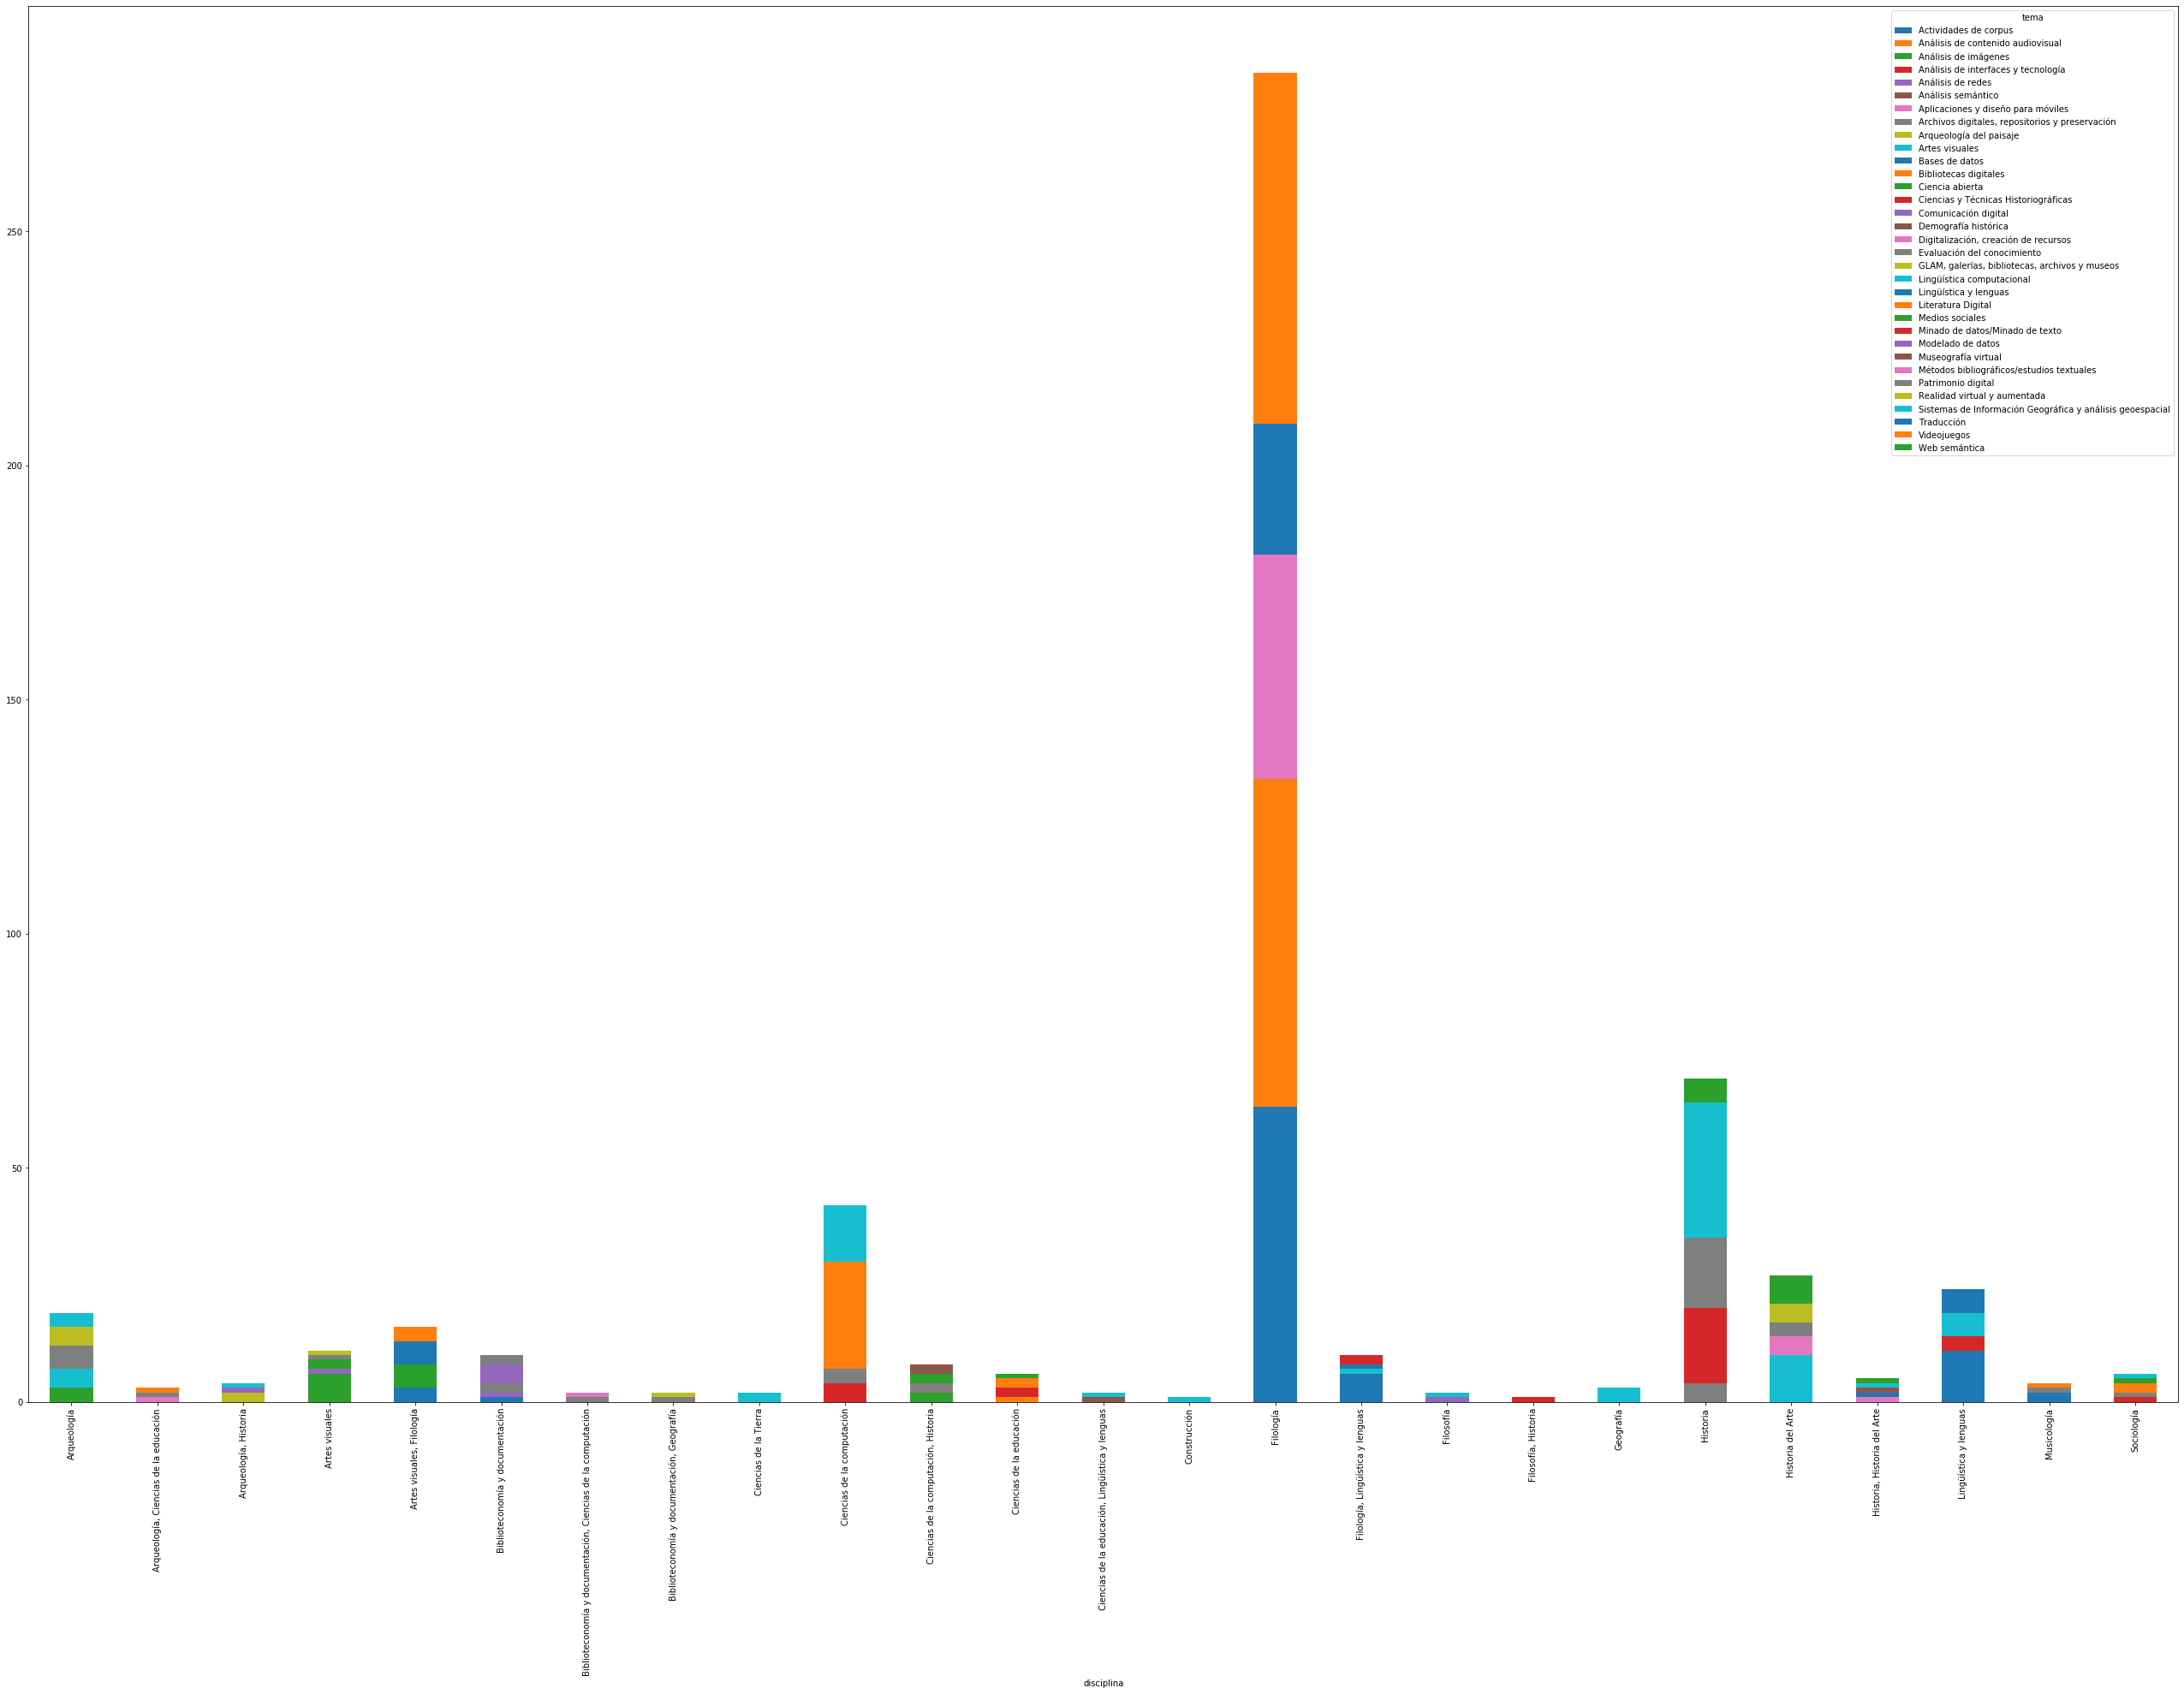

In [49]:
#disciplinas_df.plot(kind="bar", stacked=True, figsize=(45,30))
# plt.savefig('img/disciplinas_temas.png', dpi=300)
pivot_df.plot.bar(stacked=True, figsize=(45,30))

# ALL

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
colors = sns.color_palette("cubehelix", n_colors=len(temas_df.columns))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

In [ ]:
colorcitos = ["#a14b49",
"#fc60ab",
"#744232",
"#f4200d",
"#29d6e7",
"#582f40",
"#2fe43e",
"#da1547",
"#1bd94f",
"#f7a4fa",
"#92503f",
"#78677f",
"#dfdc2b",
"#8b8352",
"#da98ed",
"#fa4920",
"#8311c0",
"#7131a7",
"#62a719",
"#388744",
"#5a0618",
"#83772d",
"#e204f8",
"#44752b",
"#b92b87",
"#02c57d",
"#52544b",
"#d57fd7",
"#faaa6f",
"#a0b84d",
"#54d47a",
"#bcc057",
"#93f52f",
"#d2e9b8",
"#8f2c0c",
"#83a43e",
"#d261c5",
"#cec4cd",
"#4054e5",
"#93bd30",
"#5b3460",
"#61c10e",
"#03bbab",
"#f58206",
"#0ca3fa",
"#02c5fa",
"#f68864",
"#6921e8",
"#4cee95",
"#dd33f3",
"#3113db",
"#8b1fec",
"#15ddef",
"#b21c0e",
"#d50ddd",
"#849f7c",
"#8c0c5a",
"#88e023",
"#2d9a80",
"#c19ac3",
"#a88393",
"#1f5886",
"#52fe38",
"#c47cc7",
"#c9a550",
]

In [ ]:
col2 = colorcitos.sort()

In [ ]:
colorcitos

In [ ]:
temas_df.plot.bar(stacked=True, figsize=(45,30), color=colorcitos)
plt.savefig('filename.png', dpi=300)